In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [3]:

df = pd.read_csv("/home/gouri/Documents/jupiter/env/worksheets/my_work/spam.csv",encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
df.shape

(5572, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [14]:
#removing unnamed columns from the dataset

In [19]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis='columns',inplace=True)

In [20]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
df.rename(columns={'v1':'categories','v2':'messages'},inplace=True)

In [26]:
df.groupby('categories').describe()

messages                                                            \
              count unique                                                top   
categories                                                                      
ham            4825   4516                             Sorry, I'll call later   
spam            747    653  Please call our customer service representativ...   

                 
           freq  
categories       
ham          30  
spam          4

In [27]:
#converting category column to numbers by making new columns

In [30]:
df['spam'] = df.categories.apply(lambda x:0 if x=='ham' else 1)
df.head()

,categories,messages,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [53]:
x =df['messages']
y = df['spam']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=100,train_size=0.8,stratify=y)

In [61]:
from sklearn.linear_model import LogisticRegression

In [66]:
pip = Pipeline([('vectorizer',CountVectorizer()),('model',MultinomialNB())])
pip.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('model', MultinomialNB())])

In [67]:
pip.predict(x_test)

array([0, 0, 0, ..., 1, 0, 0])

In [68]:
y_test

5273    0
5027    0
529     0
4886    1
2459    0
       ..
3413    0
3266    0
2208    1
5173    0
859     0
Name: spam, Length: 1115, dtype: int64

In [69]:
pip.score(x_test,y_test)

0.989237668161435

<Axes: >

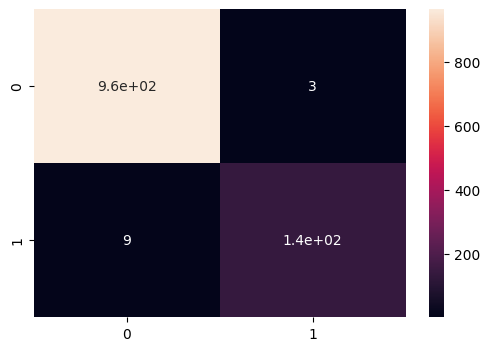

In [73]:
from sklearn.metrics import confusion_matrix

y_predicted = pip.predict(x_test)
cm = confusion_matrix(y_test,y_predicted)

import seaborn as sn
plt.figure(figsize = (6,4))
sn.heatmap(cm,annot = True)